#  Importing and Preprocessing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pwd

'D:\\training\\data science\\Rahimyan\\researching\\modeling'

In [3]:
df=pd.read_csv('bank datasets.csv')
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [4]:
df_copy=df.copy(deep=True)

In [5]:
df_copy.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df_copy.shape

(10000, 14)

In [8]:
df_copy.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
pd.isnull(df_copy).sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df_copy.duplicated().sum()

0

### transforming Geography to numerical column

In [12]:
df_copy.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
int_Geography=[]
for i in df_copy['Geography']:
    if i=="France":
        int_Geography.append(1)
    elif i=="Germany":
        int_Geography.append(2)
    else :
        int_Geography.append(3)
df_copy['int_Geography']=int_Geography
df_copy=df_copy.drop(['Geography'],axis=1)

df_copy

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,3
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1,2


### transforming Gender to numerical column

In [14]:
int_Gender=[]
for i in df_copy['Gender']:
    if i=="Female":
        int_Gender.append(1)
    elif i=="Male":
        int_Gender.append(2)

df_copy['int_Gender']=int_Gender
df_copy=df_copy.drop(['Gender'],axis=1)

df_copy

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography,int_Gender
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,3,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,2
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,2
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,1
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,2,2


### final preprcessing 

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  int_Geography    10000 non-null  int64  
 13  int_Gender       10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [16]:
df_copy.CustomerId.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [17]:
df_copy=df_copy.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)

### Normalizing columns

### Balance

### CreditScore

### EstimatedSalary

### int_Surname

### correlation between data columns

In [18]:
df_copy.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,int_Geography,int_Gender
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.007888,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.022812,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,0.003739,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.069408,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.003972,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.008523,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.006724,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.001369,-0.008112
int_Geography,0.007888,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,1.000000,0.004719
int_Gender,-0.002857,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,0.004719,1.000000


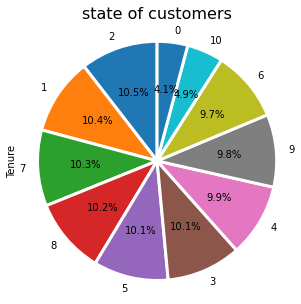

<Figure size 864x432 with 0 Axes>

In [19]:
x=df_copy['Tenure'].value_counts()
x.plot.pie(figsize=(5, 5),autopct='%1.1f%%',startangle=90, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},radius=1.1)
plt.title('state of customers',fontsize=16)
plt.figure(figsize =(12, 6))
plt.show()

so the state of the customers is one of 1,2,3,...,10 months. if tenure of a customer is grater than 5 months then he/she is loyal, else isn't loyal. 

In [20]:
target_Lable_remainstatue=[]
for i in df_copy['Tenure']:
    if i>=5:
        target_Lable_remainstatue.append(1)
    else :
        target_Lable_remainstatue.append(0)

df_copy['target_Lable_remainstatue']=target_Lable_remainstatue


df_copy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,int_Geography,int_Gender,target_Lable_remainstatue
0,619,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,3,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,699,39,1,0.00,2,0,0,93826.63,1,1,0
4,850,43,2,125510.82,1,1,1,79084.10,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,2,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,2,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,1
9998,772,42,3,75075.31,2,1,0,92888.52,2,2,0


In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CreditScore                10000 non-null  int64  
 1   Age                        10000 non-null  int64  
 2   Tenure                     10000 non-null  int64  
 3   Balance                    10000 non-null  float64
 4   NumOfProducts              10000 non-null  int64  
 5   HasCrCard                  10000 non-null  int64  
 6   IsActiveMember             10000 non-null  int64  
 7   EstimatedSalary            10000 non-null  float64
 8   int_Geography              10000 non-null  int64  
 9   int_Gender                 10000 non-null  int64  
 10  target_Lable_remainstatue  10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [22]:
from sklearn.preprocessing import StandardScaler

features = df_copy[['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','int_Geography','int_Gender']]
sc= StandardScaler()
scaled=sc.fit_transform(features)
df_copy_scaled=pd.DataFrame(scaled, index=features.index , columns=features.columns)
df_copy_standard= pd.concat([df_copy_scaled , df_copy['Tenure']] , axis=1)
df_copy_standard

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,int_Geography,int_Gender,Tenure
0,-0.326221,0.293517,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.901886,-1.095988,2
1,-0.440036,0.198164,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.515067,-1.095988,1
2,-1.536794,0.293517,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.901886,-1.095988,8
3,0.501521,0.007457,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.901886,-1.095988,1
4,2.063884,0.388871,0.785728,-0.911583,0.646092,0.970243,-0.365276,1.515067,-1.095988,2
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.901886,0.912419,5
9996,-1.391939,-0.373958,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.901886,0.912419,10
9997,0.604988,-0.278604,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-0.901886,-1.095988,7
9998,1.256835,0.293517,-0.022608,0.807737,0.646092,-1.030670,-0.125231,0.306591,0.912419,3


# classification

## logistic regression 

### length of customer lifetime based on Tenure

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
features = ['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','int_Geography','int_Gender']
target = 'Tenure'

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_copy[features], df_copy[target], test_size=0.30, random_state=42)

In [26]:
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [27]:
model = LogisticRegression()

In [28]:
logistic_classifier=model.fit(X_train, y_train)

In [29]:
predictions = model.predict(X_test)

In [30]:
y_test=y_test.to_frame('real')

In [31]:
y_test['prediction']=predictions

In [32]:
y_test

,real,prediction
6252,3,8
4684,1,7
1731,4,3
4742,8,5
4521,7,8
...,...,...
8014,2,1
1074,7,7
3063,7,7
6487,2,4


In [33]:
y_train_pred=model.predict(X_train)
y_train_pred

array([8, 1, 4, ..., 2, 9, 1], dtype=int64)

In [34]:
y_train=y_train.to_frame('real')
y_train['prediction']=y_train_pred
y_train

,real,prediction
9069,4,8
2603,7,1
7738,6,4
1579,8,8
5058,9,2
...,...,...
5734,8,1
5191,1,1
5390,1,2
860,8,9


In [35]:
#concat two prediction table 
Tenure=pd.concat([y_train['prediction'],y_test['prediction']], axis=0)
Tenure

9069    8
2603    1
7738    4
1579    8
5058    2
       ..
8014    1
1074    7
3063    7
6487    4
4705    4
Name: prediction, Length: 10000, dtype: int64

## 5-Fold validation

### 1th method

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [37]:
xval = KFold(n_splits=5)
allTrainAcc, allTestAcc = [], []
for t_idx, v_idx in xval.split(df_copy[features], df_copy[target]):
    # Split dataset into two pieces
    train_df_copy = df_copy.iloc[t_idx].copy()
    test_df_copy = df_copy.iloc[v_idx].copy()
    # Train the model
    model = LogisticRegression()
    model.fit(train_df_copy[features], train_df_copy[target])
    # Calculate accuracy
    train_df_copy['prediction'] = model.predict(train_df_copy[features])
    test_df_copy['prediction'] = model.predict(test_df_copy[features])
    trainingAccuracy = mean_squared_error(train_df_copy[target], train_df_copy['prediction']) ** 0.5
    testAccuracy = mean_squared_error(test_df_copy[target], test_df_copy['prediction']) ** 0.5
    
    allTrainAcc.append(trainingAccuracy)
    allTestAcc.append(testAccuracy)
    
    print('train accuracy: {0}, test accuracy: {1}'.format(trainingAccuracy, testAccuracy))
print('avg train acc', sum(allTrainAcc) / len(allTrainAcc))
print('avg test acc', sum(allTestAcc) / len(allTestAcc))

train accuracy: 4.131827682757353, test accuracy: 4.161309889926488
train accuracy: 4.287787891209172, test accuracy: 4.303428865451362
train accuracy: 3.9712403603911963, test accuracy: 4.006494727314639
train accuracy: 4.145569924630387, test accuracy: 4.136665323663494
train accuracy: 4.033391872853417, test accuracy: 4.081727575426855
avg train acc 4.113963546368305
avg test acc 4.137925276356567


### 2th method

In [38]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, df_copy[features] , df_copy[target] , scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.097 (0.006)


### confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
    
y_true= y_test['real']
y_pred= y_test['prediction']

In [40]:
cm=confusion_matrix( y_true , y_pred)
cm

array([[ 0, 32, 20,  7, 13, 10,  1, 13, 20,  6,  0],
       [ 0, 61, 70, 17, 38,  8,  1, 35, 57, 18,  0],
       [ 0, 63, 66, 34, 30, 12,  2, 35, 55, 22,  0],
       [ 0, 56, 68, 18, 30, 10,  1, 30, 58, 23,  0],
       [ 0, 48, 52, 30, 33,  6,  0, 27, 58, 25,  0],
       [ 0, 49, 49, 25, 30, 20,  1, 36, 69, 11,  0],
       [ 0, 42, 61, 22, 49, 11,  1, 34, 56, 27,  0],
       [ 0, 60, 56, 20, 40, 14,  0, 37, 66, 15,  0],
       [ 0, 56, 64, 19, 35, 13,  0, 29, 79, 22,  0],
       [ 0, 64, 66, 22, 50, 12,  0, 26, 50, 20,  0],
       [ 0, 29, 33, 12, 14,  8,  0, 16, 29, 12,  0]], dtype=int64)

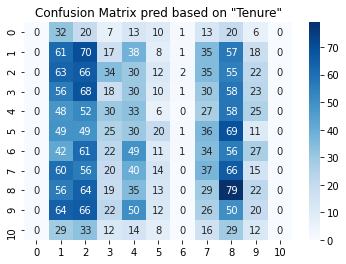

In [41]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size":10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix pred based on "Tenure"')
plt.show()

In [42]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN) 
 
PSA= pd.DataFrame([TPR , TNR , ACC], index=['TPR' , 'TNR' , 'ACC'] )
PSA

,0,1,2,3,4,5,6,7,8,9,10
TPR,0.000000,0.200000,0.206897,0.061224,0.118280,0.068966,0.003300,0.120130,0.249211,0.064516,0.000
TNR,1.000000,0.814842,0.798956,0.923134,0.879089,0.961624,0.997775,0.895617,0.806933,0.932714,1.000
ACC,0.959333,0.752333,0.736000,0.838667,0.808333,0.875333,0.897333,0.816000,0.748000,0.843000,0.949


In [43]:
from openpyxl import load_workbook

book = load_workbook('total_pred.xlsx')
writer = pd.ExcelWriter('total_pred.xlsx', engine='openpyxl') 
writer.book = book

Tenure.to_excel(writer,sheet_name='Tenure')
writer.save()
